In [78]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
# data import from codecademy as dictionary and then converted to to dataframe

def count_html_files_in_assets_folder(folder_path):
    assets_count = {}
    assets_count_dict_temp = {}

    for root, _, files in os.walk(folder_path):

        html_file_count = len([file for file in files if file.endswith('.html')])

        if html_file_count > 0:
            relative_path = os.path.relpath(root, folder_path)
            
            # Remove '/assets' from the relative_path
            relative_path = relative_path.replace('/assets', '')
            assets_count_dict_temp[relative_path] = html_file_count
            
    for key, value in assets_count_dict_temp.items():
        modified_key1 = key.split("/")[-1] # removes the double folder name 
        # remove everything before '.' for example, 'CODECADEMY.' and it applies .lower() to keys. Also replaces " " with "_"
        modified_key2 = modified_key1.split(".")[-1].lower().replace(' ', '_') 
        assets_count[modified_key2] = value
    
    # Convert the dictionary to a DataFrame and transpose it
    data = list(assets_count.items())

    # Convert the list of tuples to a DataFrame
    df = pd.DataFrame(data, columns=['data_point', 'count'])
    
    return df


main_folder_path = r'/Users/matthewtryba/Downloads/subject-request-package/Your Data Archive'
codecademy = count_html_files_in_assets_folder(main_folder_path)

print(codecademy.head())

# export codecademy as .csv

codecademy.to_csv('codecamy.csv')


                       data_point  count
0             user_reset_progress      1
1               weekly_target_met     22
2                  user_streak_v2    131
3                    mobile_users      1
4  notifiable_container_completed     81


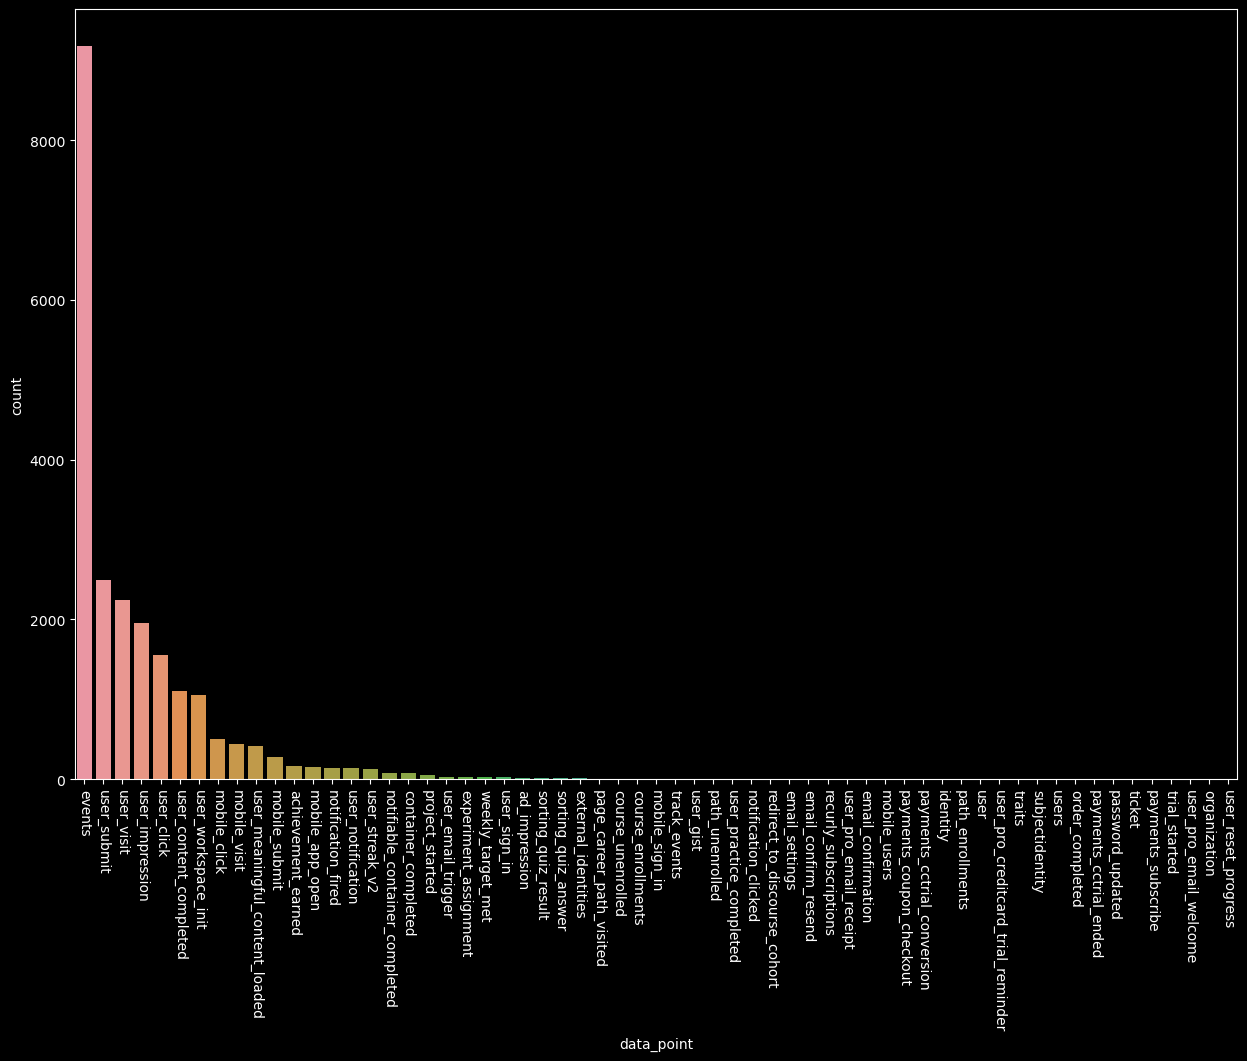

In [93]:
# Sort the DataFrame by the 'count' column in descending order
codecademy_sorted = codecademy.sort_values(by='count', ascending=False)

plt.figure(figsize=(15, 10))
x_labels = codecademy_sorted['data_point'].tolist()
ax = sns.barplot(x='data_point', y='count', data=codecademy_sorted)
ax.set_xticklabels(x_labels, rotation=270)
plt.show()